# Importing neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib  # For saving the model

In [3]:
# Load the dataset
data = pd.read_csv(r'E:\Excel Files\Heart_Disease_Data1.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
# Display summary statistics for numerical columns
data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# Display summary statistics for numerical columns (Transform format)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [9]:
# Check for missing values
data.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

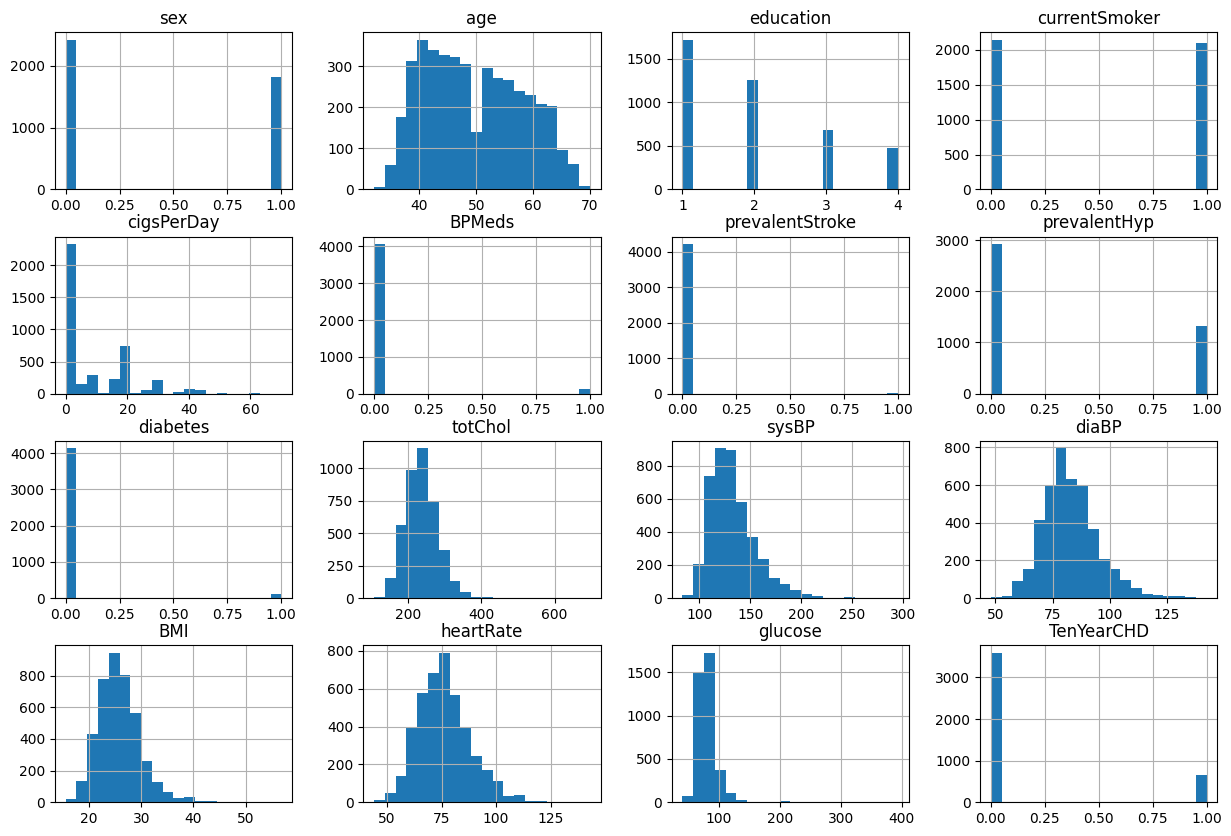

In [10]:
# Visualize the distribution of numerical features
data.hist(bins=20, figsize=(15, 10))
plt.show()

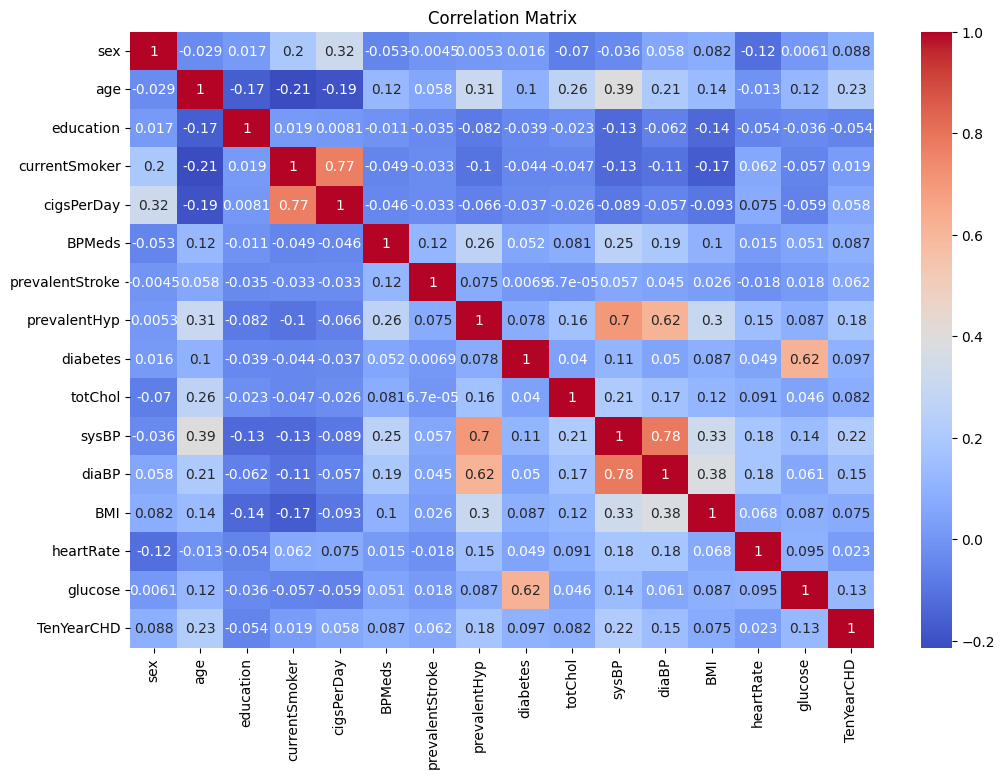

In [11]:
# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Fill missing values with median values for simplicity
data.fillna(data.median(), inplace=True)

In [13]:
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [14]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [15]:
# Split the data into features (X) and target (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [18]:
# Train Logistic Regression
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Train Random Forest
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Train Gradient Boosting
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [21]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return precision, recall, f1

In [22]:
# Evaluate Logistic Regression
print("Logistic Regression:")
lr_precision, lr_recall, lr_f1 = evaluate_model(logistic_regression, X_test, y_test)

Logistic Regression:
Precision: 0.6000
Recall: 0.0726
F1 Score: 0.1295
Confusion Matrix:
[[718   6]
 [115   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [23]:
# Evaluate Random Forest
print("\nRandom Forest:")
rf_precision, rf_recall, rf_f1 = evaluate_model(random_forest, X_test, y_test)


Random Forest:
Precision: 0.4348
Recall: 0.0806
F1 Score: 0.1361
Confusion Matrix:
[[711  13]
 [114  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.43      0.08      0.14       124

    accuracy                           0.85       848
   macro avg       0.65      0.53      0.53       848
weighted avg       0.80      0.85      0.80       848



In [24]:
# Evaluate Gradient Boosting
print("\nGradient Boosting:")
gb_precision, gb_recall, gb_f1 = evaluate_model(gradient_boosting, X_test, y_test)


Gradient Boosting:
Precision: 0.3667
Recall: 0.0887
F1 Score: 0.1429
Confusion Matrix:
[[705  19]
 [113  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.37      0.09      0.14       124

    accuracy                           0.84       848
   macro avg       0.61      0.53      0.53       848
weighted avg       0.79      0.84      0.80       848



In [25]:
# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Precision': [lr_precision, rf_precision, gb_precision],
    'Recall': [lr_recall, rf_recall, gb_recall],
    'F1 Score': [lr_f1, rf_f1, gb_f1]
})

In [26]:
print(model_comparison)

                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.600000  0.072581  0.129496
1        Random Forest   0.434783  0.080645  0.136054
2    Gradient Boosting   0.366667  0.088710  0.142857


In [27]:
# Select the best model based on F1 Score
best_model_name = model_comparison.loc[model_comparison['F1 Score'].idxmax(), 'Model']
print(f"The best model is: {best_model_name}")

The best model is: Gradient Boosting


In [28]:
# Set the best model
if best_model_name == 'Logistic Regression':
    best_model = logistic_regression
elif best_model_name == 'Random Forest':
    best_model = random_forest
else:
    best_model = gradient_boosting

In [29]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved!")

Best model saved!
